In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import pyflow
from pyflow.euler_quasi1D.fvm import *
from pyflow.euler_quasi1D.model import PrimitiveState, Euler, CaloricallyPerfectGas
from pyflow.euler_quasi1D.problems import SupersonicInlet

In [7]:
inlet_problem = SupersonicInlet(Nx=21, pExit_p0=15)

# Define the CFL number to use for the numerical methods
CFL = 0.5

# Final simulation time
time = 0.02

print(inlet_problem)

  Supersonic Inlet problem:

    Length               : 1.0

    Throat Area          : 0.09038820320220758

    Cells                : 20

    Specific Heat Ratio  : 1.4

    Inlet Mach Number    : 2.5

    Inlet Pressure       : 100000.0

    Inlet Density        : 1.1612175607020156

    Inlet Speed of Sound : 347.221988884981



In [8]:
SW_inlet = StegerWarmingMethod(inlet_problem, CFL=CFL)
SW_inlet.solve(time, print_frequency=1000)



Simulation Complete
Final time = 0.02
Total number of iterations = 974


In [9]:
SW = SW_inlet.get_primitives(normalize=True)

<IPython.core.display.Javascript object>


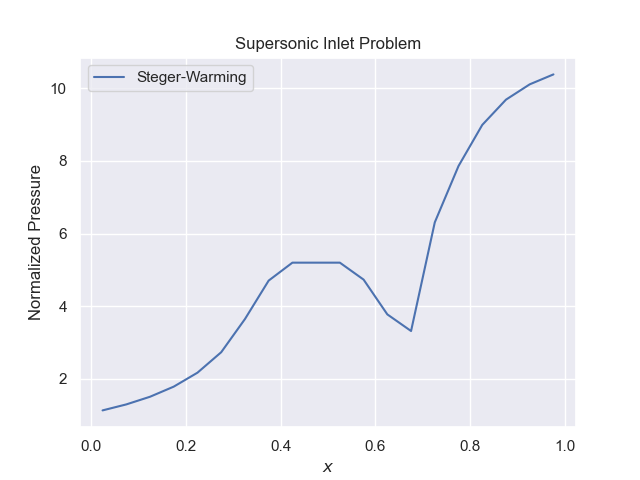

Text(0.5, 1.0, 'Supersonic Inlet Problem')

In [10]:
fig, ax = plt.subplots()
ax.plot(SW.x, SW.pressure, label='Steger-Warming')

ax.set_xlabel(r'$x$')
ax.set_ylabel('Normalized Pressure')
ax.legend()
plt.title('Supersonic Inlet Problem')

In [ ]:
MC_inlet = MacCormackMethod(inlet_problem, CFL=CFL)
MC_inlet.solve(time, dissipation=0.2, print_frequency=1000)

In [ ]:
MC = MC_inlet.get_primitives(normalize=True)

In [ ]:
fig, ax = plt.subplots()
ax.plot(MC.x, MC.pressure, label=r'MacCormack, $\epsilon = 0.2$')

ax.set_xlabel(r'$x$')
ax.set_ylabel('Normalized Pressure')
ax.legend()
plt.title('Supersonic Inlet Problem')

In [4]:
HLLC_inlet = HLLCMethod(inlet_problem, CFL=CFL)
HLLC_inlet.solve(time, print_frequency=1000)

HLLC = HLLC_inlet.get_primitives(normalize=True)

iteration: 1000,  time =      0.00082,  p_max = 1179649.49994
iteration: 2000,  time =      0.00164,  p_max = 1146686.48208
iteration: 3000,  time =      0.00247,  p_max = 1131052.73556
iteration: 4000,  time =      0.00329,  p_max = 1131052.73556
iteration: 5000,  time =      0.00411,  p_max = 1131052.73556
iteration: 6000,  time =      0.00494,  p_max = 1131052.73556
iteration: 7000,  time =      0.00576,  p_max = 1131052.73556
iteration: 8000,  time =      0.00658,  p_max = 1131052.73556
iteration: 9000,  time =      0.00740,  p_max = 1131052.73556
iteration: 10000,  time =      0.00823,  p_max = 1131052.73556
iteration: 11000,  time =      0.00905,  p_max = 1131052.73556
iteration: 12000,  time =      0.00987,  p_max = 1131052.73556
iteration: 13000,  time =      0.01070,  p_max = 1131052.73556
iteration: 14000,  time =      0.01152,  p_max = 1131052.73556
iteration: 15000,  time =      0.01234,  p_max = 1131052.73556
iteration: 16000,  time =      0.01316,  p_max = 1131052.73556
i

In [5]:
HLLC = HLLC_inlet.get_primitives(normalize=True)

<IPython.core.display.Javascript object>


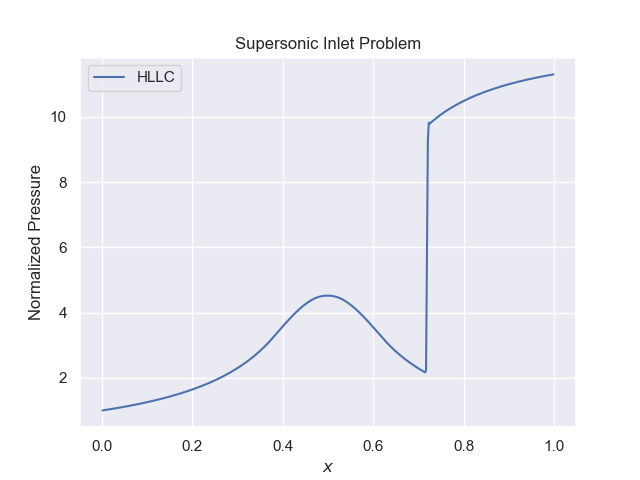

Text(0.5, 1.0, 'Supersonic Inlet Problem')

In [6]:
fig, ax = plt.subplots()
ax.plot(HLLC.x, HLLC.pressure, label=r'HLLC')

ax.set_xlabel(r'$x$')
ax.set_ylabel('Normalized Pressure')
ax.legend()
plt.title('Supersonic Inlet Problem')